In [20]:
#importando as bibliotecas
import numpy as np
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Lendo o arquivo

df = pd.read_csv('C://Users//Herla//OneDrive//Desktop//TCC//all_bovespa3.csv')
df

,data_pregao,sigla_acao,nome_acao,preco_abertura,preco_maximo,preco_minimo,preco_fechamento,qtd_negocios,volume_negocio
0,2019-01-02,AALR3,ALLIAR,13.31,13.50,13.25,0.1325,2642,3523962
1,2019-01-02,AAPL34,APPLE,60.71,60.71,59.89,0.6041,168,1015969
2,2019-01-02,ABBV34,ABBVIE,342.84,342.84,342.84,3.4284,3,102852
3,2019-01-02,ABCB4,ABC BRASIL,16.47,17.20,16.35,0.1712,5717,9598300
4,2019-01-02,ABEV3,AMBEV S/A,15.40,16.30,15.40,0.1615,186929,298201954
...,...,...,...,...,...,...,...,...,...
381485,2020-12-28,Z1TO34,ZTO EXPRESS,36.72,36.72,36.72,0.3672,0,1358
381486,2020-12-29,Z1TO34,ZTO EXPRESS,36.31,36.31,36.31,0.3631,1,3631
381487,2020-12-30,Z1TO34,ZTO EXPRESS,38.09,38.09,37.50,0.3750,0,2295
381488,2020-12-23,Z1TS34,ZOETIS INC,209.18,209.18,209.18,2.0918,0,10459


In [3]:
#filtrando o ação
df_acao = df[df['sigla_acao'] == 'MRVE3']

In [4]:
#verificar o tipo do arquivo
df_acao.dtypes

data_pregao          object
sigla_acao           object
nome_acao            object
preco_abertura      float64
preco_maximo        float64
preco_minimo        float64
preco_fechamento    float64
qtd_negocios          int64
volume_negocio        int64
dtype: object

In [5]:
#Mudar o tipo data
df_acao['data_pregao'] = pd.to_datetime(df_acao['data_pregao'], format='%Y-%m-%d')

C:\Users\Herla\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [6]:
#verificar o tipo do arquivo
df_acao.dtypes

data_pregao         datetime64[ns]
sigla_acao                  object
nome_acao                   object
preco_abertura             float64
preco_maximo               float64
preco_minimo               float64
preco_fechamento           float64
qtd_negocios                 int64
volume_negocio               int64
dtype: object

In [7]:
#criando novos campos de medias móveis
df_acao['mm5d'] = df_acao['preco_fechamento'].rolling(5).mean()
df_acao['mm21d'] = df_acao['preco_fechamento'].rolling(21).mean()


C:\Users\Herla\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Herla\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
df_acao

,data_pregao,sigla_acao,nome_acao,preco_abertura,preco_maximo,preco_minimo,preco_fechamento,qtd_negocios,volume_negocio,mm5d,mm21d
245,2019-01-02,MRVE3,MRV,12.39,12.82,12.34,0.1264,32691,41223689,NaN,NaN
592,2019-01-03,MRVE3,MRV,12.62,12.73,12.29,0.1263,32628,40689654,NaN,NaN
940,2019-01-04,MRVE3,MRV,12.63,12.69,12.36,0.1245,27712,34594227,NaN,NaN
1294,2019-01-07,MRVE3,MRV,12.40,12.66,12.36,0.1256,30651,38262550,NaN,NaN
1661,2019-01-08,MRVE3,MRV,12.61,13.15,12.54,0.1305,62129,80077184,0.12666,NaN
...,...,...,...,...,...,...,...,...,...,...,...
380032,2020-12-22,MRVE3,MRV,19.21,19.42,19.02,0.1918,25423,48883751,0.19698,0.197748
380033,2020-12-23,MRVE3,MRV,19.23,19.34,18.95,0.1902,22828,43595648,0.19404,0.197252
380034,2020-12-28,MRVE3,MRV,19.13,19.23,18.74,0.1916,29975,56950315,0.19224,0.196919
380035,2020-12-29,MRVE3,MRV,19.23,19.26,18.91,0.1920,18362,35110967,0.19136,0.196690


In [27]:
#empurrando para frente os valores das ações
df_acao['preco_fechamento'] = df_acao['preco_fechamento'].shift(5)

df_acao.head()

,data_pregao,sigla_acao,nome_acao,preco_abertura,preco_maximo,preco_minimo,preco_fechamento,qtd_negocios,volume_negocio,mm5d,mm21d
0,2019-01-31,MRVE3,MRV,14.92,15.15,14.91,NaN,54034,81191629,0.15000,0.138167
1,2019-02-01,MRVE3,MRV,15.04,15.09,14.60,NaN,67882,100399483,0.14990,0.139195
2,2019-02-04,MRVE3,MRV,14.85,14.85,14.61,NaN,35796,52617970,0.14856,0.140157
3,2019-02-05,MRVE3,MRV,14.70,14.90,14.63,NaN,42694,63039148,0.14844,0.141310
4,2019-02-06,MRVE3,MRV,14.70,14.83,14.38,NaN,33193,48295244,0.14746,0.142190


In [10]:
#retirando os dados nulos
df_acao.dropna(inplace=True)
df_acao

C:\Users\Herla\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,data_pregao,sigla_acao,nome_acao,preco_abertura,preco_maximo,preco_minimo,preco_fechamento,qtd_negocios,volume_negocio,mm5d,mm21d
7345,2019-01-31,MRVE3,MRV,14.92,15.15,14.91,0.1480,54034,81191629,0.15000,0.138167
7696,2019-02-01,MRVE3,MRV,15.04,15.09,14.60,0.1465,67882,100399483,0.14990,0.139195
8079,2019-02-04,MRVE3,MRV,14.85,14.85,14.61,0.1487,35796,52617970,0.14856,0.140157
8429,2019-02-05,MRVE3,MRV,14.70,14.90,14.63,0.1441,42694,63039148,0.14844,0.141310
8769,2019-02-06,MRVE3,MRV,14.70,14.83,14.38,0.1423,33193,48295244,0.14746,0.142190
...,...,...,...,...,...,...,...,...,...,...,...
380031,2020-12-21,MRVE3,MRV,19.23,19.70,18.80,0.1918,57787,111322275,0.19944,0.198067
380032,2020-12-22,MRVE3,MRV,19.21,19.42,19.02,0.1902,25423,48883751,0.19698,0.197748
380033,2020-12-23,MRVE3,MRV,19.23,19.34,18.95,0.1916,22828,43595648,0.19404,0.197252
380034,2020-12-28,MRVE3,MRV,19.13,19.23,18.74,0.1920,29975,56950315,0.19224,0.196919


In [11]:
#verificcanndo quantidade de linhas
qtd_linhas = len(df_acao) 
qtd_linhas_treino = qtd_linhas -173
qtd_linhas_teste = qtd_linhas -6


qtd_linhas_validaçao = qtd_linhas_treino - qtd_linhas_teste

info =(
    f"linhas treino = 0:{qtd_linhas_treino} "
    f"linhas teste = {qtd_linhas_treino}:{qtd_linhas_teste} "
    f"linhas Validação = {qtd_linhas_teste}:{qtd_linhas} "
)
info


'linhas treino = 0:518 linhas teste = 518:685 linhas Validação = 685:691 '

In [12]:
#reindexando o data frame
df_acao = df_acao.reset_index(drop=True)
df_acao

,data_pregao,sigla_acao,nome_acao,preco_abertura,preco_maximo,preco_minimo,preco_fechamento,qtd_negocios,volume_negocio,mm5d,mm21d
0,2019-01-31,MRVE3,MRV,14.92,15.15,14.91,0.1480,54034,81191629,0.15000,0.138167
1,2019-02-01,MRVE3,MRV,15.04,15.09,14.60,0.1465,67882,100399483,0.14990,0.139195
2,2019-02-04,MRVE3,MRV,14.85,14.85,14.61,0.1487,35796,52617970,0.14856,0.140157
3,2019-02-05,MRVE3,MRV,14.70,14.90,14.63,0.1441,42694,63039148,0.14844,0.141310
4,2019-02-06,MRVE3,MRV,14.70,14.83,14.38,0.1423,33193,48295244,0.14746,0.142190
...,...,...,...,...,...,...,...,...,...,...,...
686,2020-12-21,MRVE3,MRV,19.23,19.70,18.80,0.1918,57787,111322275,0.19944,0.198067
687,2020-12-22,MRVE3,MRV,19.21,19.42,19.02,0.1902,25423,48883751,0.19698,0.197748
688,2020-12-23,MRVE3,MRV,19.23,19.34,18.95,0.1916,22828,43595648,0.19404,0.197252
689,2020-12-28,MRVE3,MRV,19.13,19.23,18.74,0.1920,29975,56950315,0.19224,0.196919


In [13]:
#separando as features e labels

features = df_acao.drop(['sigla_acao', 'nome_acao', 'data_pregao', 'preco_fechamento'], 1)
labels = df_acao['preco_fechamento']

In [14]:
#escolhendo as melhores features com kbest

features_list = ('preco_abertura', 'qtd_negocios', 'volume_negocio', 'mm5d', 'mm21d')

k_best_features = SelectKBest(k='all')
k_best_features.fit_transform(features, labels)
k_best_features_scores = k_best_features.scores_
raw_pairs = zip(features_list[1:], k_best_features_scores)
ordered_pairs = list(reversed(sorted(raw_pairs, key=lambda x: x[1])))

k_best_features_final = dict(ordered_pairs[:15])
best_features = k_best_features_final.keys()
print('')
print("Melhores features")
print(k_best_features_final)


Melhores features
{'mm5d': 20.847810347371063, 'volume_negocio': 20.57009908287282, 'qtd_negocios': 17.812580820699413, 'mm21d': 1.4228978134627905}


In [15]:
#separando as features escolhidas
features = df_acao.drop(['sigla_acao', 'nome_acao', 'data_pregao', 'preco_fechamento', 'preco_abertura', 'mm21d'], 1)

In [16]:
#Normalizando os dados de entrada(features)

#Gerando o novo padrão
scaler = MinMaxScaler().fit(features)
features_scale = scaler.transform(features)

print('Features: ', features_scale.shape)
print (features_scale)

Features:  (691, 5)
[[0.37815811 0.456985   0.24852256 0.2010932  0.39511519]
 [0.37326813 0.43251776 0.32713782 0.26093093 0.39424909]
 [0.35370823 0.43330702 0.14498521 0.11207842 0.38264334]
 ...
 [0.7196414  0.77584846 0.07136572 0.08397141 0.77654599]
 [0.71067645 0.75927388 0.11193932 0.12557486 0.76095618]
 [0.71312143 0.7726914  0.04601218 0.0575393  0.75333449]]


In [17]:
#separa os dados de treino e validação

x_train = features_scale[:qtd_linhas_treino]
x_test = features_scale[qtd_linhas_treino:qtd_linhas_teste]

y_train = labels[:qtd_linhas_treino]
y_test = labels[qtd_linhas_treino:qtd_linhas_teste]

print(len(x_train), len(y_train))

print(len(x_test), len(y_test))


518 518
167 167


RSME: 0.005787
MSE: 0.000033


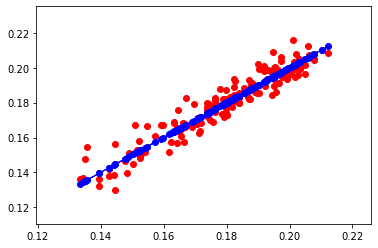

In [26]:
#treinamento usando regressão Linear

lr = linear_model.LinearRegression()
lr.fit(x_train, y_train)
pred= lr.predict(x_test)
cd =r2_score(y_test, pred)

f'Coeficiente de determinação:{cd * 100:.2f}'
plt.scatter(pred,y_test,color="Red", marker='o')
plt.plot(pred,pred,color="blue", linewidth=1, marker='o')

print('RSME: %.6f' % np.sqrt(mean_squared_error(y_test, pred )))
print('MSE: %.6f' % mean_squared_error(y_test, pred))

In [172]:
#rede neural
rn = MLPRegressor(max_iter=2000)

rn.fit(x_train, y_train)
pred= rn.predict(x_test)

cd =rn.score(x_test, y_test)

f'Coeficiente de determinação:{cd * 100:.2f}'


'Coeficiente de determinação:77.46'

In [173]:
#rede neural com ajuste hyper parameters

rn = MLPRegressor()

parameter_space ={
    'hidden_layer_sizes': [(i,) for i in list(range(1, 21))],
    'activation':['tanh', 'relu'],
    'solver': ['sgd', 'adam', 'lbfgs'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant', 'adaptive'],
}

search = GridSearchCV(rn, parameter_space, n_jobs=-1, cv=5)

search.fit(x_train, y_train)
clf = search.best_estimator_
pred= search.predict(x_test)

cd = search.score(x_test, y_test)

f'Coeficiente de determinação:{cd * 100:.2f}'


C:\Users\Herla\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


'Coeficiente de determinação:89.30'

In [174]:
#executando a previsão

previsao=features_scale[qtd_linhas_teste:qtd_linhas]

data_pregao_full = df_acao['data_pregao']
data_pregao=data_pregao_full[qtd_linhas_teste:qtd_linhas]

res_full=df_acao['preco_fechamento']
res=res_full[qtd_linhas_teste:qtd_linhas]

pred=lr.predict(previsao)

df= pd.DataFrame({'data_pregao': data_pregao, 'real':res, 'previsao':pred})
df['real'] = df['real'].shift(+1)

df.set_index('data_pregao', inplace=True)
print(df)

               real  previsao
data_pregao                  
2020-12-18      NaN  0.200736
2020-12-21   0.1912  0.191530
2020-12-22   0.1918  0.190541
2020-12-23   0.1902  0.189926
2020-12-28   0.1916  0.188595
2020-12-29   0.1920  0.189424


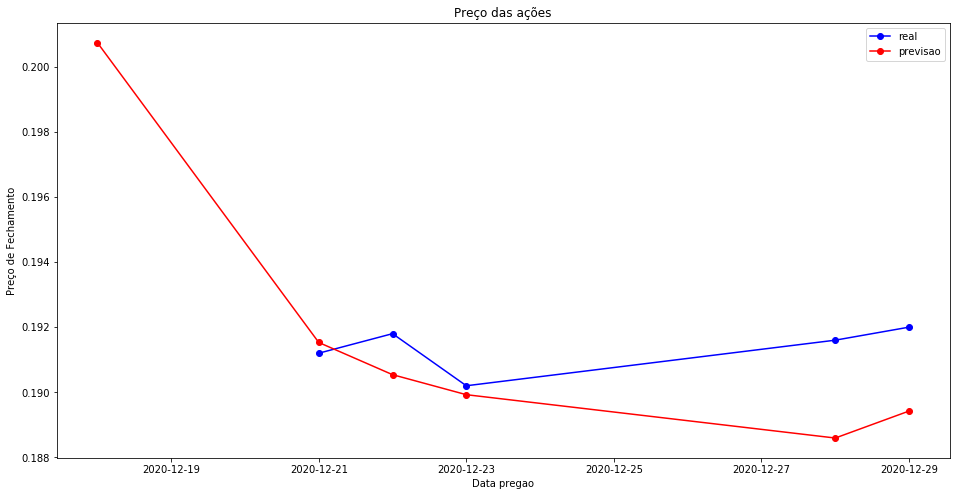

In [175]:
#grafico
plt.figure(figsize=(16,8))
plt.title('Preço das ações')
plt.plot(df['real'], label="real", color='blue', marker='o')
plt.plot(df['previsao'], label="previsao",color='red', marker='o')
plt.xlabel('Data pregao')
plt.ylabel('Preço de Fechamento')
leg = plt.legend()


In [ ]:
#Case 2-------------------------------------#case 2-----------------------------------------------------case 2

In [130]:
#importando as bibliotecas
import numpy as np
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
%matplotlib inline

In [131]:
#Lendo o arquivo

df = pd.read_csv('C://Users//Herla//OneDrive//Desktop//TCC//all_bovespa4.csv')
df

,data_pregao,sigla_acao,nome_acao,preco_abertura,preco_maximo,preco_minimo,preco_fechamento,qtd_negocios,volume_negocio
0,2017-01-02,AALR3,ALLIAR,14.62,14.88,14.40,0.1460,359,523505
1,2017-01-02,ABCB4,ABC BRASIL,13.40,13.52,13.08,0.1331,1958,2605570
2,2017-01-02,ABEV3,AMBEV S/A,16.34,16.66,16.26,0.1631,42654,70040067
3,2017-01-02,ADHM3,ADVANCED-DH,0.81,0.83,0.76,0.0079,686,54075
4,2017-01-02,AFLT3,AFLUENTE T,3.18,3.18,3.18,0.0318,1,318
...,...,...,...,...,...,...,...,...,...
551606,2021-11-12,X1YL34,XYLEM INC,357.35,357.35,355.60,3.5560,0,712
551607,2021-11-12,XPBR31,XP INC,184.61,185.00,179.20,1.8401,3394,62000612
551608,2021-11-12,YDUQ3,YDUQS PART,24.19,24.76,23.50,0.2381,16745,40076682
551609,2021-11-12,Z1OM34,ZOOM VIDEO,53.72,55.50,53.40,0.5550,274,1478267


In [132]:
#filtrando o ação
df_acao = df[df['sigla_acao'] == 'MRVE3']

In [133]:
#verificar o tipo do arquivo
df_acao.dtypes

data_pregao          object
sigla_acao           object
nome_acao            object
preco_abertura      float64
preco_maximo        float64
preco_minimo        float64
preco_fechamento    float64
qtd_negocios          int64
volume_negocio        int64
dtype: object

In [134]:
#Mudar o tipo data
df_acao['data_pregao'] = pd.to_datetime(df_acao['data_pregao'], format='%Y-%m-%d')

C:\Users\Herla\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [135]:
#verificar o tipo do arquivo
df_acao.dtypes

data_pregao         datetime64[ns]
sigla_acao                  object
nome_acao                   object
preco_abertura             float64
preco_maximo               float64
preco_minimo               float64
preco_fechamento           float64
qtd_negocios                 int64
volume_negocio               int64
dtype: object

In [136]:
#criando novos campos de medias móveis
df_acao['mm5d'] = df_acao['preco_fechamento'].rolling(5).mean()
df_acao['mm21d'] = df_acao['preco_fechamento'].rolling(21).mean()

C:\Users\Herla\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Herla\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [137]:
df_acao

,data_pregao,sigla_acao,nome_acao,preco_abertura,preco_maximo,preco_minimo,preco_fechamento,qtd_negocios,volume_negocio,mm5d,mm21d
169,2017-01-02,MRVE3,MRV,10.83,11.18,10.83,0.1105,9841,10839265,NaN,NaN
474,2017-01-03,MRVE3,MRV,11.18,11.42,11.15,0.1130,46378,52446093,NaN,NaN
799,2017-01-04,MRVE3,MRV,11.19,11.34,11.19,0.1130,62937,71058565,NaN,NaN
1109,2017-01-05,MRVE3,MRV,11.35,11.43,11.26,0.1135,48501,54897523,NaN,NaN
1402,2017-01-06,MRVE3,MRV,11.35,11.42,11.25,0.1136,24788,28088807,0.11272,NaN
...,...,...,...,...,...,...,...,...,...,...,...
548021,2021-11-08,MRVE3,MRV,11.32,11.49,11.19,0.1130,39824,45083953,0.11082,0.113276
548857,2021-11-09,MRVE3,MRV,11.32,12.00,11.30,0.1172,55399,65519192,0.11302,0.113286
549680,2021-11-10,MRVE3,MRV,11.81,12.62,11.65,0.1227,78162,96016844,0.11542,0.113295
550503,2021-11-11,MRVE3,MRV,12.43,12.80,12.35,0.1247,56747,71646254,0.11838,0.113490


In [138]:
#empurrando para frente os valores das ações
df_acao['preco_fechamento'] = df_acao['preco_fechamento'].shift(-1)

df_acao.head()

C:\Users\Herla\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,data_pregao,sigla_acao,nome_acao,preco_abertura,preco_maximo,preco_minimo,preco_fechamento,qtd_negocios,volume_negocio,mm5d,mm21d
169,2017-01-02,MRVE3,MRV,10.83,11.18,10.83,0.1130,9841,10839265,NaN,NaN
474,2017-01-03,MRVE3,MRV,11.18,11.42,11.15,0.1130,46378,52446093,NaN,NaN
799,2017-01-04,MRVE3,MRV,11.19,11.34,11.19,0.1135,62937,71058565,NaN,NaN
1109,2017-01-05,MRVE3,MRV,11.35,11.43,11.26,0.1136,48501,54897523,NaN,NaN
1402,2017-01-06,MRVE3,MRV,11.35,11.42,11.25,0.1146,24788,28088807,0.11272,NaN


In [139]:
#retirando os dados nulos
df_acao.dropna(inplace=True)
df_acao

C:\Users\Herla\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,data_pregao,sigla_acao,nome_acao,preco_abertura,preco_maximo,preco_minimo,preco_fechamento,qtd_negocios,volume_negocio,mm5d,mm21d
6495,2017-01-31,MRVE3,MRV,12.39,12.82,12.39,0.1288,42884,54185359,0.12354,0.117576
6826,2017-02-01,MRVE3,MRV,12.85,12.99,12.81,0.1330,29427,37970346,0.12534,0.118448
7157,2017-02-02,MRVE3,MRV,12.83,13.34,12.82,0.1358,40345,53408161,0.12732,0.119400
7519,2017-02-03,MRVE3,MRV,13.32,13.82,13.32,0.1335,43621,59490914,0.12954,0.120486
7889,2017-02-06,MRVE3,MRV,13.89,13.93,13.27,0.1327,38093,51495830,0.13174,0.121438
...,...,...,...,...,...,...,...,...,...,...,...
547200,2021-11-05,MRVE3,MRV,11.13,11.50,11.06,0.1130,41823,47425106,0.10852,0.113514
548021,2021-11-08,MRVE3,MRV,11.32,11.49,11.19,0.1172,39824,45083953,0.11082,0.113276
548857,2021-11-09,MRVE3,MRV,11.32,12.00,11.30,0.1227,55399,65519192,0.11302,0.113286
549680,2021-11-10,MRVE3,MRV,11.81,12.62,11.65,0.1247,78162,96016844,0.11542,0.113295


In [140]:
#verificcanndo quantidade de linhas
qtd_linhas = len(df_acao) 
qtd_linhas_treino = qtd_linhas -295
qtd_linhas_teste = qtd_linhas -23


qtd_linhas_validaçao = qtd_linhas_treino - qtd_linhas_teste

info =(
    f"linhas treino = 0:{qtd_linhas_treino} "
    f"linhas teste = {qtd_linhas_treino}:{qtd_linhas_teste} "
    f"linhas Validação = {qtd_linhas_teste}:{qtd_linhas} "
)
info


'linhas treino = 0:887 linhas teste = 887:1159 linhas Validação = 1159:1182 '

In [141]:
#reindexando o data frame
df_acao = df_acao.reset_index(drop=True)
df_acao

,data_pregao,sigla_acao,nome_acao,preco_abertura,preco_maximo,preco_minimo,preco_fechamento,qtd_negocios,volume_negocio,mm5d,mm21d
0,2017-01-31,MRVE3,MRV,12.39,12.82,12.39,0.1288,42884,54185359,0.12354,0.117576
1,2017-02-01,MRVE3,MRV,12.85,12.99,12.81,0.1330,29427,37970346,0.12534,0.118448
2,2017-02-02,MRVE3,MRV,12.83,13.34,12.82,0.1358,40345,53408161,0.12732,0.119400
3,2017-02-03,MRVE3,MRV,13.32,13.82,13.32,0.1335,43621,59490914,0.12954,0.120486
4,2017-02-06,MRVE3,MRV,13.89,13.93,13.27,0.1327,38093,51495830,0.13174,0.121438
...,...,...,...,...,...,...,...,...,...,...,...
1177,2021-11-05,MRVE3,MRV,11.13,11.50,11.06,0.1130,41823,47425106,0.10852,0.113514
1178,2021-11-08,MRVE3,MRV,11.32,11.49,11.19,0.1172,39824,45083953,0.11082,0.113276
1179,2021-11-09,MRVE3,MRV,11.32,12.00,11.30,0.1227,55399,65519192,0.11302,0.113286
1180,2021-11-10,MRVE3,MRV,11.81,12.62,11.65,0.1247,78162,96016844,0.11542,0.113295


In [142]:
#separando as features e labels

features = df_acao.drop(['sigla_acao', 'nome_acao', 'data_pregao', 'preco_fechamento'], 1)
labels = df_acao['preco_fechamento']

In [143]:
#escolhendo as melhores features com kbest

features_list = ('preco_abertura', 'qtd_negocios', 'volume_negocio', 'mm5d', 'mm21d')

k_best_features = SelectKBest(k='all')
k_best_features.fit_transform(features, labels)
k_best_features_scores = k_best_features.scores_
raw_pairs = zip(features_list[1:], k_best_features_scores)
ordered_pairs = list(reversed(sorted(raw_pairs, key=lambda x: x[1])))

k_best_features_final = dict(ordered_pairs[:15])
best_features = k_best_features_final.keys()
print('')
print("Melhores features")
print(k_best_features_final)


Melhores features
{'volume_negocio': 65.22545810342876, 'mm5d': 64.53416252635307, 'qtd_negocios': 49.2084758177333, 'mm21d': 1.523735834310939}


In [144]:
#separando as features escolhidas
features = df_acao.drop(['sigla_acao', 'nome_acao', 'data_pregao', 'preco_fechamento', 'preco_abertura', 'mm21d'], 1)

In [145]:
#Normalizando os dados de entrada(features)

#Gerando o novo padrão
scaler = MinMaxScaler().fit(features)
features_scale = scaler.transform(features)

print('Features: ', features_scale.shape)
print (features_scale)

Features:  (1182, 5)
[[0.18826406 0.25808998 0.21076278 0.14501013 0.16594492]
 [0.20211899 0.29123915 0.13676182 0.09610046 0.18153473]
 [0.23064385 0.29202841 0.19680064 0.14266586 0.19868353]
 ...
 [0.12143439 0.17205998 0.27958361 0.17919661 0.07483111]
 [0.17196414 0.19968429 0.40475889 0.2711873  0.09561753]
 [0.18663407 0.25493291 0.28699635 0.19767779 0.12125411]]


In [146]:
#separa os dados de treino e validação

x_train = features_scale[:qtd_linhas_treino]
x_test = features_scale[qtd_linhas_treino:qtd_linhas_teste]

y_train = labels[:qtd_linhas_treino]
y_test = labels[qtd_linhas_treino:qtd_linhas_teste]

print(len(x_train), len(y_train))

print(len(x_test), len(y_test))

887 887
272 272


Coeficiente de determinação:96.12
RSME: 0.004284
MSE: 0.000018


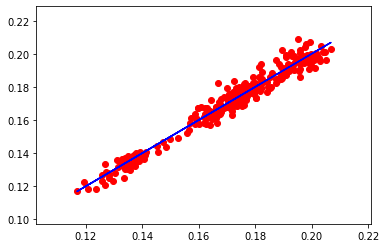

In [147]:
#treinamento usando regressão Linear

lr = linear_model.LinearRegression()
lr.fit(x_train, y_train)
pred= lr.predict(x_test)
cd =r2_score(y_test, pred)

print(f'Coeficiente de determinação:{cd * 100:.2f}')
plt.scatter(pred,y_test,color="Red", marker='o')
plt.plot(pred,pred,color="blue")

print('RSME: %.6f' % np.sqrt(mean_squared_error(y_test, pred )))
print('MSE: %.6f' % mean_squared_error(y_test, pred))

In [68]:
#executando a previsão

previsao=features_scale[qtd_linhas_teste:qtd_linhas]

data_pregao_full = df_acao['data_pregao']
data_pregao=data_pregao_full[qtd_linhas_teste:qtd_linhas]

res_full=df_acao['preco_fechamento']
res=res_full[qtd_linhas_teste:qtd_linhas]

pred=lr.predict(previsao)

df= pd.DataFrame({'data_pregao': data_pregao, 'real':res, 'previsao':pred})
df['real'] = df['real'].shift(+1)

df.set_index('data_pregao', inplace=True)
print(df)

               real  previsao
data_pregao                  
2021-10-08      NaN  0.118445
2021-10-11   0.1267  0.117680
2021-10-13   0.1208  0.119146
2021-10-14   0.1180  0.120258
2021-10-15   0.1180  0.122332
2021-10-18   0.1170  0.123300
2021-10-19   0.1225  0.125270
2021-10-20   0.1206  0.124412
2021-10-21   0.1243  0.125429
2021-10-22   0.1230  0.124680
2021-10-25   0.1239  0.114131
2021-10-26   0.1248  0.110566
2021-10-27   0.1160  0.107844
2021-10-28   0.1151  0.106599
2021-10-29   0.1075  0.107492
2021-11-01   0.1054  0.105023
2021-11-03   0.1089  0.104800
2021-11-04   0.1041  0.103781
2021-11-05   0.1070  0.106499
2021-11-08   0.1031  0.109847
2021-11-09   0.1015  0.111788
2021-11-10   0.1062  0.113044
2021-11-11   0.1107  0.114389


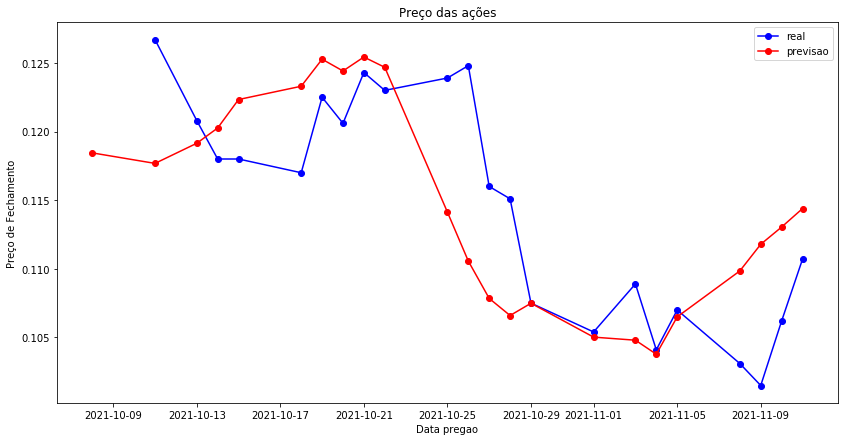

In [72]:
#grafico
plt.figure(figsize=(14,7))
plt.title('Preço das ações')
plt.plot(df['real'], label="real", color='blue', marker='o')
plt.plot(df['previsao'], label="previsao",color='red', marker='o')
plt.xlabel('Data pregao')
plt.ylabel('Preço de Fechamento')
leg = plt.legend()

In [ ]:
#Case 3-------------------------------------#case 3-----------------------------------------------------case 3

In [149]:
#importando as bibliotecas
import numpy as np
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
%matplotlib inline

In [150]:
#Lendo o arquivo

df = pd.read_csv('C://Users//Herla//OneDrive//Desktop//TCC//all_bovespa4.csv')
df

,data_pregao,sigla_acao,nome_acao,preco_abertura,preco_maximo,preco_minimo,preco_fechamento,qtd_negocios,volume_negocio
0,2017-01-02,AALR3,ALLIAR,14.62,14.88,14.40,0.1460,359,523505
1,2017-01-02,ABCB4,ABC BRASIL,13.40,13.52,13.08,0.1331,1958,2605570
2,2017-01-02,ABEV3,AMBEV S/A,16.34,16.66,16.26,0.1631,42654,70040067
3,2017-01-02,ADHM3,ADVANCED-DH,0.81,0.83,0.76,0.0079,686,54075
4,2017-01-02,AFLT3,AFLUENTE T,3.18,3.18,3.18,0.0318,1,318
...,...,...,...,...,...,...,...,...,...
551606,2021-11-12,X1YL34,XYLEM INC,357.35,357.35,355.60,3.5560,0,712
551607,2021-11-12,XPBR31,XP INC,184.61,185.00,179.20,1.8401,3394,62000612
551608,2021-11-12,YDUQ3,YDUQS PART,24.19,24.76,23.50,0.2381,16745,40076682
551609,2021-11-12,Z1OM34,ZOOM VIDEO,53.72,55.50,53.40,0.5550,274,1478267


In [151]:
#filtrando o ação
df_acao = df[df['sigla_acao'] == 'MRVE3']

In [152]:
#verificar o tipo do arquivo
df_acao.dtypes

data_pregao          object
sigla_acao           object
nome_acao            object
preco_abertura      float64
preco_maximo        float64
preco_minimo        float64
preco_fechamento    float64
qtd_negocios          int64
volume_negocio        int64
dtype: object

In [153]:
#Mudar o tipo data
df_acao['data_pregao'] = pd.to_datetime(df_acao['data_pregao'], format='%Y-%m-%d')

C:\Users\Herla\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [154]:
#verificar o tipo do arquivo
df_acao.dtypes

data_pregao         datetime64[ns]
sigla_acao                  object
nome_acao                   object
preco_abertura             float64
preco_maximo               float64
preco_minimo               float64
preco_fechamento           float64
qtd_negocios                 int64
volume_negocio               int64
dtype: object

In [155]:
#criando novos campos de medias móveis
df_acao['mm5d'] = df_acao['preco_fechamento'].rolling(5).mean()
df_acao['mm21d'] = df_acao['preco_fechamento'].rolling(21).mean()

C:\Users\Herla\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Herla\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [156]:
df_acao

,data_pregao,sigla_acao,nome_acao,preco_abertura,preco_maximo,preco_minimo,preco_fechamento,qtd_negocios,volume_negocio,mm5d,mm21d
169,2017-01-02,MRVE3,MRV,10.83,11.18,10.83,0.1105,9841,10839265,NaN,NaN
474,2017-01-03,MRVE3,MRV,11.18,11.42,11.15,0.1130,46378,52446093,NaN,NaN
799,2017-01-04,MRVE3,MRV,11.19,11.34,11.19,0.1130,62937,71058565,NaN,NaN
1109,2017-01-05,MRVE3,MRV,11.35,11.43,11.26,0.1135,48501,54897523,NaN,NaN
1402,2017-01-06,MRVE3,MRV,11.35,11.42,11.25,0.1136,24788,28088807,0.11272,NaN
...,...,...,...,...,...,...,...,...,...,...,...
548021,2021-11-08,MRVE3,MRV,11.32,11.49,11.19,0.1130,39824,45083953,0.11082,0.113276
548857,2021-11-09,MRVE3,MRV,11.32,12.00,11.30,0.1172,55399,65519192,0.11302,0.113286
549680,2021-11-10,MRVE3,MRV,11.81,12.62,11.65,0.1227,78162,96016844,0.11542,0.113295
550503,2021-11-11,MRVE3,MRV,12.43,12.80,12.35,0.1247,56747,71646254,0.11838,0.113490


In [157]:
#empurrando para frente os valores das ações
df_acao['preco_fechamento'] = df_acao['preco_fechamento'].shift(-10)

df_acao.head()

C:\Users\Herla\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,data_pregao,sigla_acao,nome_acao,preco_abertura,preco_maximo,preco_minimo,preco_fechamento,qtd_negocios,volume_negocio,mm5d,mm21d
169,2017-01-02,MRVE3,MRV,10.83,11.18,10.83,0.1148,9841,10839265,NaN,NaN
474,2017-01-03,MRVE3,MRV,11.18,11.42,11.15,0.1181,46378,52446093,NaN,NaN
799,2017-01-04,MRVE3,MRV,11.19,11.34,11.19,0.1186,62937,71058565,NaN,NaN
1109,2017-01-05,MRVE3,MRV,11.35,11.43,11.26,0.1197,48501,54897523,NaN,NaN
1402,2017-01-06,MRVE3,MRV,11.35,11.42,11.25,0.1200,24788,28088807,0.11272,NaN


In [158]:
#retirando os dados nulos
df_acao.dropna(inplace=True)
df_acao

C:\Users\Herla\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,data_pregao,sigla_acao,nome_acao,preco_abertura,preco_maximo,preco_minimo,preco_fechamento,qtd_negocios,volume_negocio,mm5d,mm21d
6495,2017-01-31,MRVE3,MRV,12.39,12.82,12.39,0.1372,42884,54185359,0.12354,0.117576
6826,2017-02-01,MRVE3,MRV,12.85,12.99,12.81,0.1383,29427,37970346,0.12534,0.118448
7157,2017-02-02,MRVE3,MRV,12.83,13.34,12.82,0.1390,40345,53408161,0.12732,0.119400
7519,2017-02-03,MRVE3,MRV,13.32,13.82,13.32,0.1398,43621,59490914,0.12954,0.120486
7889,2017-02-06,MRVE3,MRV,13.89,13.93,13.27,0.1413,38093,51495830,0.13174,0.121438
...,...,...,...,...,...,...,...,...,...,...,...
539550,2021-10-22,MRVE3,MRV,10.63,10.79,9.86,0.1130,163695,169217300,0.11376,0.121733
540427,2021-10-25,MRVE3,MRV,10.63,11.00,10.46,0.1172,60538,65350737,0.11058,0.120476
541276,2021-10-26,MRVE3,MRV,10.74,10.92,10.36,0.1227,51175,53849531,0.10820,0.119043
542111,2021-10-27,MRVE3,MRV,10.52,10.91,10.47,0.1247,63723,68506768,0.10658,0.117833


In [159]:
#verificcanndo quantidade de linhas
qtd_linhas = len(df_acao) 
qtd_linhas_treino = qtd_linhas -295
qtd_linhas_teste = qtd_linhas -23


qtd_linhas_validaçao = qtd_linhas_treino - qtd_linhas_teste

info =(
    f"linhas treino = 0:{qtd_linhas_treino} "
    f"linhas teste = {qtd_linhas_treino}:{qtd_linhas_teste} "
    f"linhas Validação = {qtd_linhas_teste}:{qtd_linhas} "
)
info

'linhas treino = 0:878 linhas teste = 878:1150 linhas Validação = 1150:1173 '

In [160]:
#reindexando o data frame
df_acao = df_acao.reset_index(drop=True)
df_acao

,data_pregao,sigla_acao,nome_acao,preco_abertura,preco_maximo,preco_minimo,preco_fechamento,qtd_negocios,volume_negocio,mm5d,mm21d
0,2017-01-31,MRVE3,MRV,12.39,12.82,12.39,0.1372,42884,54185359,0.12354,0.117576
1,2017-02-01,MRVE3,MRV,12.85,12.99,12.81,0.1383,29427,37970346,0.12534,0.118448
2,2017-02-02,MRVE3,MRV,12.83,13.34,12.82,0.1390,40345,53408161,0.12732,0.119400
3,2017-02-03,MRVE3,MRV,13.32,13.82,13.32,0.1398,43621,59490914,0.12954,0.120486
4,2017-02-06,MRVE3,MRV,13.89,13.93,13.27,0.1413,38093,51495830,0.13174,0.121438
...,...,...,...,...,...,...,...,...,...,...,...
1168,2021-10-22,MRVE3,MRV,10.63,10.79,9.86,0.1130,163695,169217300,0.11376,0.121733
1169,2021-10-25,MRVE3,MRV,10.63,11.00,10.46,0.1172,60538,65350737,0.11058,0.120476
1170,2021-10-26,MRVE3,MRV,10.74,10.92,10.36,0.1227,51175,53849531,0.10820,0.119043
1171,2021-10-27,MRVE3,MRV,10.52,10.91,10.47,0.1247,63723,68506768,0.10658,0.117833


In [161]:
#separando as features e labels

features = df_acao.drop(['sigla_acao', 'nome_acao', 'data_pregao', 'preco_fechamento'], 1)
labels = df_acao['preco_fechamento']

In [162]:
#escolhendo as melhores features com kbest

features_list = ('preco_abertura', 'qtd_negocios', 'volume_negocio', 'mm5d', 'mm21d')

k_best_features = SelectKBest(k='all')
k_best_features.fit_transform(features, labels)
k_best_features_scores = k_best_features.scores_
raw_pairs = zip(features_list[1:], k_best_features_scores)
ordered_pairs = list(reversed(sorted(raw_pairs, key=lambda x: x[1])))

k_best_features_final = dict(ordered_pairs[:15])
best_features = k_best_features_final.keys()
print('')
print("Melhores features")
print(k_best_features_final)


Melhores features
{'volume_negocio': 10.286115765380934, 'mm5d': 9.890433349705045, 'qtd_negocios': 9.65145405036758, 'mm21d': 1.2034307055331699}


In [163]:
#separando as features escolhidas
features = df_acao.drop(['sigla_acao', 'nome_acao', 'data_pregao', 'preco_fechamento', 'preco_abertura', 'mm21d'], 1)

In [164]:
#Normalizando os dados de entrada(features)

#Gerando o novo padrão
scaler = MinMaxScaler().fit(features)
features_scale = scaler.transform(features)

print('Features: ', features_scale.shape)
print (features_scale)

Features:  (1173, 5)
[[0.16930776 0.25808998 0.21076278 0.14501013 0.15629928]
 [0.18348624 0.29123915 0.13676182 0.09610046 0.17206939]
 [0.21267723 0.29202841 0.19680064 0.14266586 0.18941651]
 ...
 [0.01084237 0.09786898 0.25635555 0.14399717 0.02190293]
 [0.01000834 0.10655091 0.32535785 0.18820809 0.00770983]
 [0.0116764  0.08918706 0.21812053 0.12220711 0.        ]]


In [165]:
#separa os dados de treino e validação

x_train = features_scale[:qtd_linhas_treino]
x_test = features_scale[qtd_linhas_treino:qtd_linhas_teste]

y_train = labels[:qtd_linhas_treino]
y_test = labels[qtd_linhas_treino:qtd_linhas_teste]

print(len(x_train), len(y_train))

print(len(x_test), len(y_test))

878 878
272 272


Coeficiente de determinação:71.69
RSME: 0.011571
MSE: 0.000134


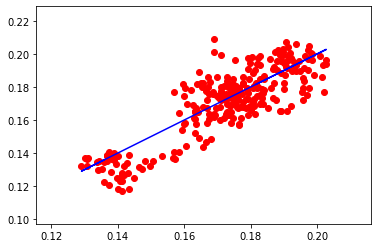

In [166]:
#treinamento usando regressão Linear

lr = linear_model.LinearRegression()
lr.fit(x_train, y_train)
pred= lr.predict(x_test)
cd =r2_score(y_test, pred)

print(f'Coeficiente de determinação:{cd * 100:.2f}')
plt.scatter(pred,y_test,color="Red", marker='o')
plt.plot(pred,pred,color="blue")

print('RSME: %.6f' % np.sqrt(mean_squared_error(y_test, pred )))
print('MSE: %.6f' % mean_squared_error(y_test, pred))

In [167]:
#rede neural
rn = MLPRegressor(max_iter=2000)

rn.fit(x_train, y_train)
pred= rn.predict(x_test)

cd =rn.score(x_test, y_test)

f'Coeficiente de determinação:{cd * 100:.2f}'

'Coeficiente de determinação:56.19'

In [92]:
#rede neural com ajuste hyper parameters

rn = MLPRegressor()

parameter_space ={
    'hidden_layer_sizes': [(i,) for i in list(range(1, 21))],
    'activation':['tanh', 'relu'],
    'solver': ['sgd', 'adam', 'lbfgs'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant', 'adaptive'],
}

search = GridSearchCV(rn, parameter_space, n_jobs=-1, cv=5)

search.fit(x_train, y_train)
clf = search.best_estimator_
pred= search.predict(x_test)

cd = search.score(x_test, y_test)

f'Coeficiente de determinação:{cd * 100:.2f}'

'Coeficiente de determinação:-51.48'

In [168]:
#executando a previsão

previsao=features_scale[qtd_linhas_teste:qtd_linhas]

data_pregao_full = df_acao['data_pregao']
data_pregao=data_pregao_full[qtd_linhas_teste:qtd_linhas]

res_full=df_acao['preco_fechamento']
res=res_full[qtd_linhas_teste:qtd_linhas]

pred=lr.predict(previsao)

df= pd.DataFrame({'data_pregao': data_pregao, 'real':res, 'previsao':pred})
df['real'] = df['real'].shift(+10)

df.set_index('data_pregao', inplace=True)
print(df)

               real  previsao
data_pregao                  
2021-09-27      NaN  0.135178
2021-09-28      NaN  0.131772
2021-09-29      NaN  0.129398
2021-09-30      NaN  0.129937
2021-10-01      NaN  0.136167
2021-10-04      NaN  0.126841
2021-10-05      NaN  0.124156
2021-10-06      NaN  0.120855
2021-10-07      NaN  0.123919
2021-10-08      NaN  0.125471
2021-10-11   0.1206  0.125908
2021-10-13   0.1243  0.127814
2021-10-14   0.1230  0.127762
2021-10-15   0.1239  0.126482
2021-10-18   0.1248  0.128864
2021-10-19   0.1160  0.125670
2021-10-20   0.1151  0.121661
2021-10-21   0.1075  0.122554
2021-10-22   0.1054  0.118878
2021-10-25   0.1089  0.113502
2021-10-26   0.1041  0.112357
2021-10-27   0.1070  0.114128
2021-10-28   0.1031  0.111556


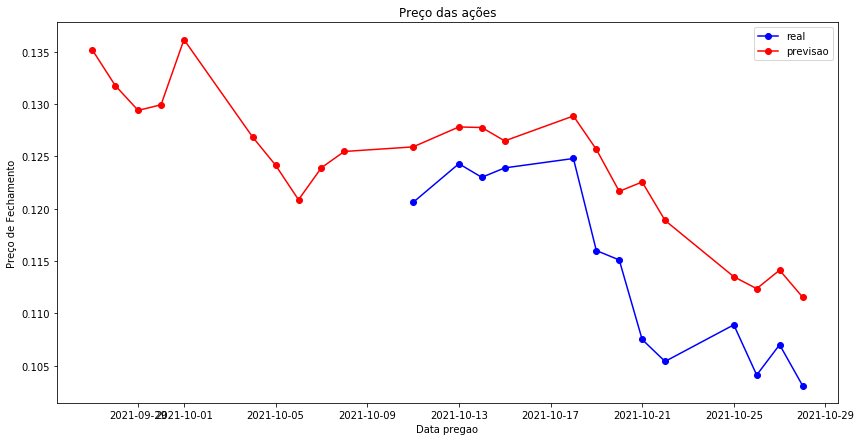

In [169]:
#grafico
plt.figure(figsize=(14,7))
plt.title('Preço das ações')
plt.plot(df['real'], label="real", color='blue', marker='o')
plt.plot(df['previsao'], label="previsao",color='red', marker='o')
plt.xlabel('Data pregao')
plt.ylabel('Preço de Fechamento')
leg = plt.legend()
